In [0]:

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

In [71]:
!pip install fastai
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

In [72]:

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch
!pip install Pillow==4.0.0
!pip install image
%matplotlib inline
from fastai.imports import *

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0


In [0]:
#%reload_ext autoreload
#%autoreload 2
%matplotlib inline

In [0]:
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
PATH = "data/dogscats/"
sz=224

In [77]:
torch.cuda.is_available()

True

In [78]:
torch.backends.cudnn.enabled

True

In [79]:
os.makedirs('data/dogscats/models', exist_ok=True)

os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}
os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}

ln: data/dogscats/tmp: cannot overwrite directory
ln: data/dogscats/tmp: cannot overwrite directory


In [80]:
os.makedirs('data/dogscats/models', exist_ok=True)
#!ln -s /datasets/fast.ai/dogscats/train {PATH}
#!ln -s /datasets/fast.ai/dogscats/test {PATH}
#!ln -s /datasets/fast.ai/dogscats/valid {PATH}
os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}

ln: data/dogscats/tmp: cannot overwrite directory


In [81]:
os.listdir(PATH)

['test1', 'sample', 'tmp', 'valid', 'train', 'models']

In [0]:
'%svalid' % 'data/dogscats/'
'{PATH}valid'.format(PATH='data/dogscats/')
PATH = 'data/dogscats/'
f'{PATH}valid/cats'
PATH1 = 'datalab'

In [0]:
#!ls

In [0]:
#%cd ..

In [0]:
#!wget http://files.fast.ai/data/dogscats.zip

In [0]:
#!unzip --help

In [0]:
#!unzip -qq -o dogscats

In [0]:
#!ls

In [89]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [0]:
#%cd ..

In [0]:
#!unzip -qq -o dogscats

In [0]:
files = os.listdir(f'{PATH}valid/cats')[:5]

In [93]:
files

['cat.8433.jpg',
 'cat.6625.jpg',
 'cat.8106.jpg',
 'cat.4597.jpg',
 'cat.9354.jpg']

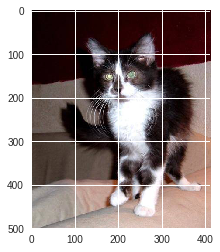

In [94]:
img = plt.imread(f'{PATH}valid/cats/{files[1]}')
plt.imshow(img);

In [95]:
img.shape

(500, 412, 3)

In [96]:
img[:4,:4]

array([[[21, 13, 11],
        [18, 10,  8],
        [15,  7,  5],
        [14,  6,  4]],

       [[16,  8,  6],
        [13,  5,  3],
        [10,  2,  0],
        [ 9,  1,  0]],

       [[14,  6,  4],
        [10,  2,  0],
        [ 7,  0,  0],
        [ 6,  0,  0]],

       [[16,  8,  6],
        [13,  5,  3],
        [ 9,  1,  0],
        [ 8,  0,  0]]], dtype=uint8)

In [0]:
arch=resnet34

In [98]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.056399   0.02802    0.989     
    1      0.040819   0.028468   0.9905    


[array([0.02847]), 0.9905]

In [99]:
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [100]:
data.classes

['cats', 'dogs']

In [101]:
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [102]:
log_preds[:10]

array([[ -0.00004, -10.11757],
       [ -0.0005 ,  -7.59763],
       [ -0.00898,  -4.71726],
       [ -0.00019,  -8.57288],
       [ -0.00085,  -7.06877],
       [ -0.0002 ,  -8.50797],
       [ -0.00031,  -8.06488],
       [ -0.     , -12.38683],
       [ -0.00004, -10.02326],
       [ -0.00004, -10.02647]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask):
  return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): 
  return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): 
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [0]:
def register_extension(id, extension):
    Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions):
    for extension in extensions:
        register_extension(id, extension)
Image.register_extensions = register_extensions

Correctly classified


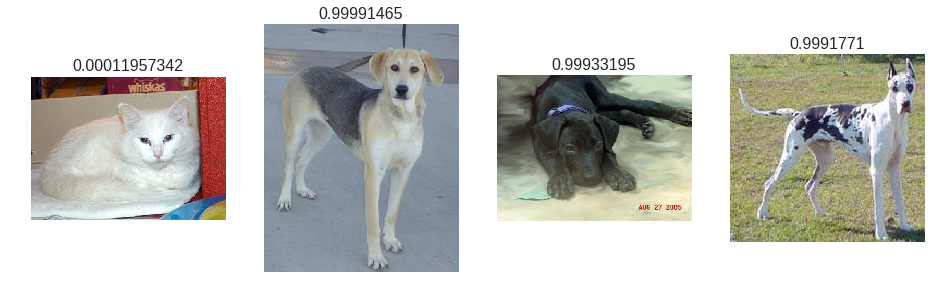

In [108]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


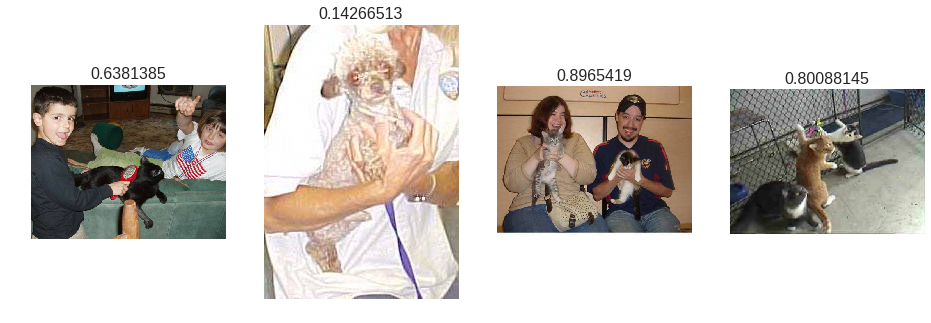

In [109]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


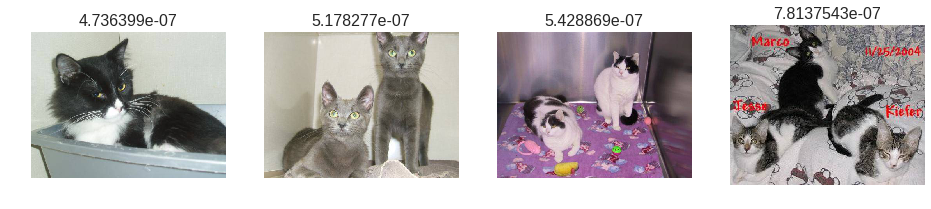

In [111]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


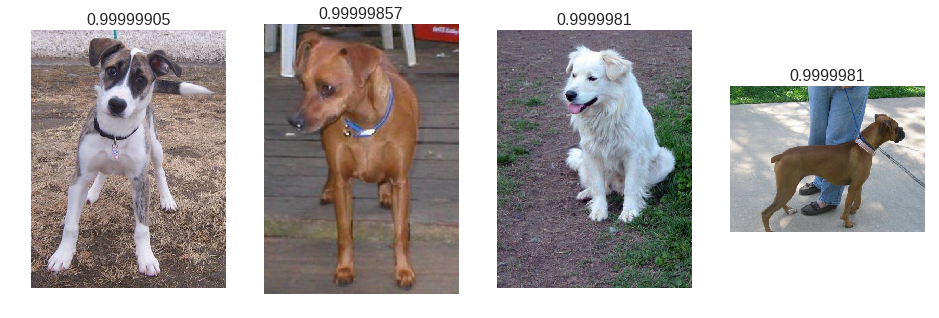

In [112]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


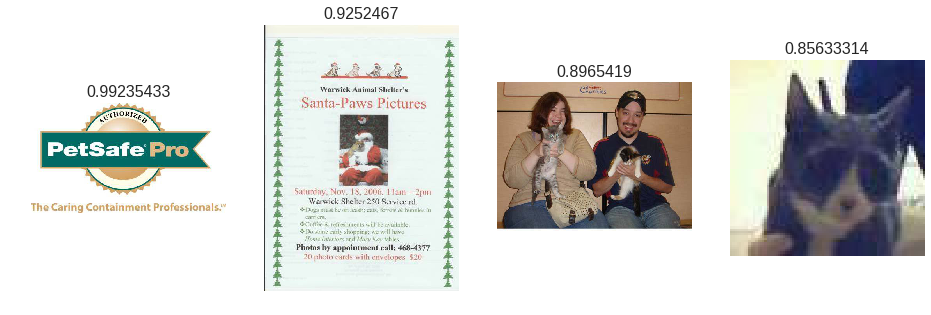

In [113]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


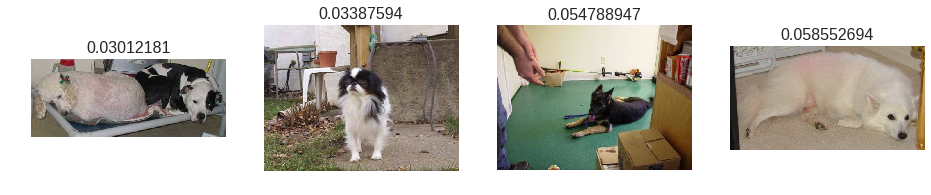

In [114]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


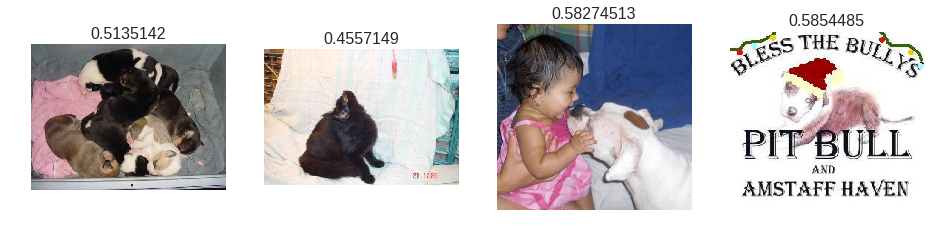

In [115]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

Choosing a learning rate

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [117]:
lrf=learn.lr_find()

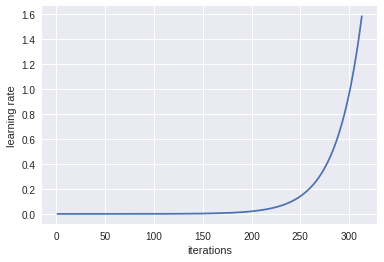

In [118]:
learn.sched.plot_lr()

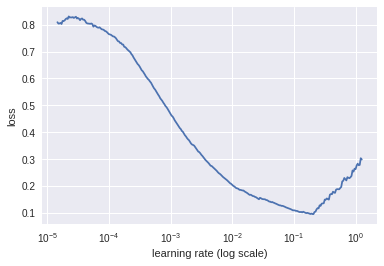

In [119]:
learn.sched.plot()

In [0]:
# bieryemz 0.01

Data augmentation

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

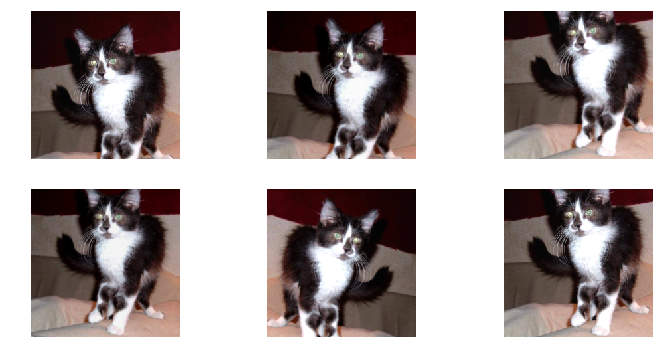

In [124]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [126]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.048274   0.027237   0.9895    


[array([0.02724]), 0.9895]

In [0]:
learn.precompute=False

In [128]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.045304   0.025647   0.9895    
 51%|█████     | 184/360 [01:34<01:30,  1.94it/s, loss=0.0437]

    1      0.042105   0.026802   0.99      
    2      0.046939   0.026324   0.9885    


[array([0.02632]), 0.9885]

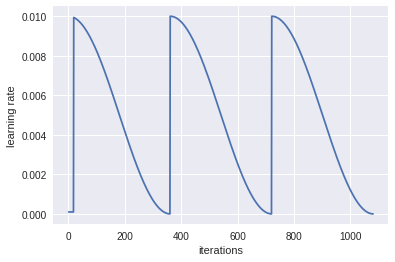

In [129]:
learn.sched.plot_lr()

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

Fine-tuning and differential learning rate annealing

In [0]:
learn.unfreeze()

In [0]:
# 3 difrend for difrends deeps
lr=np.array([1e-4,1e-3,1e-2])

In [134]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.051506   0.02778    0.9895    
 51%|█████     | 184/360 [03:09<03:00,  1.03s/it, loss=0.0402]

    1      0.039576   0.021965   0.9895    
    2      0.0372     0.021121   0.9915    
  1%|▏         | 5/360 [00:09<11:35,  1.96s/it, loss=0.0346]

    3      0.02939    0.022274   0.9895    
 74%|███████▍  | 266/360 [04:30<01:35,  1.02s/it, loss=0.0264]

    4      0.023582   0.019357   0.992     
    5      0.016818   0.020269   0.9925    
 11%|█         | 40/360 [00:46<06:08,  1.15s/it, loss=0.0178]

    6      0.017564   0.019571   0.9915    


[array([0.01957]), 0.9915]

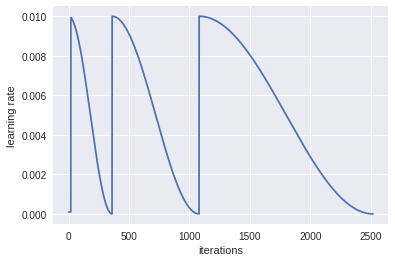

In [135]:
learn.sched.plot_lr()

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

In [138]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [139]:
accuracy_np(probs, y)

0.994

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[995   5]
 [  7 993]]


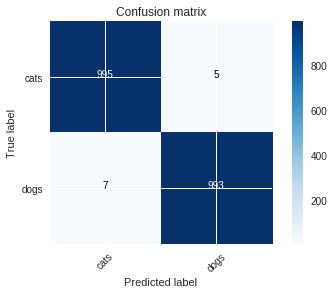

In [142]:
plot_confusion_matrix(cm, data.classes)

Most incorrect cats


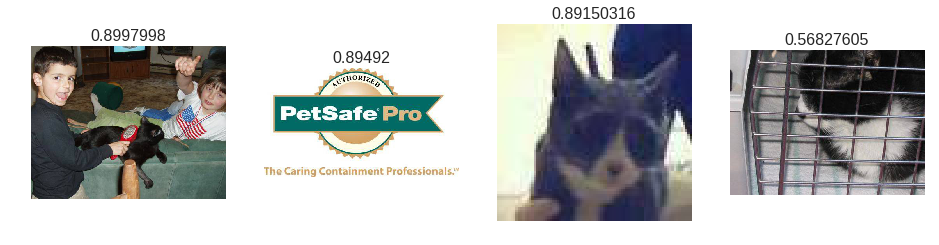

In [143]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


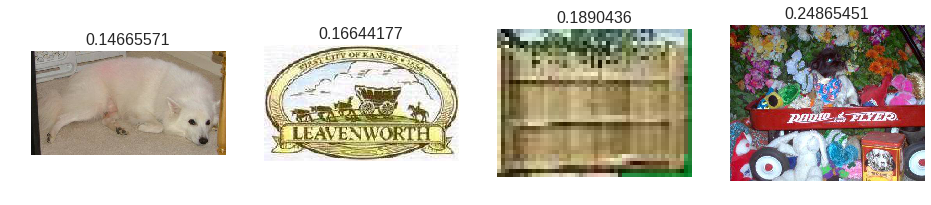

In [144]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [146]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018